# Train word2vec models and explore word embeddings

In [1]:
# Install gensim, an NLP package that contains useful tools for static word embeddings like word2vec
! pip install --user gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 25.4 MB/s eta 0:00:0000:0100:01


Now restart your kernel with **Kernel > Restart Kernel**. Test the installation by running:

In [1]:
import gensim

## Load pretrained word embeddings from Google News
These are some famous pretrained word embeddings from Google News a long time ago (like 2013). Source site: https://code.google.com/archive/p/word2vec/

In [1]:
# Load embeddings
from gensim.models import KeyedVectors

file_path = '/ix/cs1671_2025s/mmyoder/GoogleNews-vectors-negative300.bin' # is 3.4G, so I stored in our class storage on CRCD
google_news_model = KeyedVectors.load_word2vec_format(file_path, binary=True)

## Explore nearest neighbors to individual words in this Google News word embedding space
Gensim's `most_similar` function provides the nearest neighbor words in a word embedding space to other words. I.e., it finds which words have the largest cosine similarities to a word you provide. Let's check it out!

Fill in a random word below. You can also provide a list of words and Gensim will search for words that are closest to the mean word embedding of those words.

In [28]:
# Run this cell (or duplicate it) as many times as you want with different words or word Lists
example_word =  # FILL IN any word here, in quotes so Python knows it's a string.
google_news_model.most_similar(example_word, topn=10, restrict_vocab=50000) # compares with most frequent 50k words


[('blankets', 0.6101428270339966),
 ('sleeping_bag', 0.5239027738571167),
 ('pillow', 0.4939947724342346),
 ('cloth', 0.47882649302482605),
 ('pillows', 0.4755792021751404),
 ('towel', 0.4718838632106781),
 ('tarp', 0.45953038334846497),
 ('mattress', 0.44775885343551636),
 ('cloak', 0.4457477033138275),
 ('rug', 0.43833112716674805)]

## Visualize word embedding spaces
We'll use a popular technique called t-SNE to reduce the dimensionality of word vectors from 300 to 2 so we can visualize them.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import random

def tsne_plot(model, words=None, num_words_to_consider=10000, num_words_to_sample=100):
    """ Creates and TSNE model and plots it 
    Based on https://www.kaggle.com/code/jeffd23/visualizing-word-vectors-with-t-sne
    Args:
        model: Word2Vec model or KeyedVectors model from gensim
        words: A list of words to plot. If None, will plot num_words_to_sample random words. Words must be in top num_words_to_consider in the vocabulary
        num_words_to_consider: the number of words to consider in the vocabulary, assumed to be sorted descending by frequency
        num_words_to_sample: if words is set to None, the number of words to randomly sample to graph from the top num_words_to_consider in the vocabulary
    """
    labels = []
    embeddings = []

    # Get embeddings for a random sample of words in the vocabulary
    sample = random.sample(model.index_to_key[:num_words_to_consider], num_words_to_sample)
    for word in sample:
        embeddings.append(model[word])
        labels.append(word)

    # Add in custom words if present
    if words is not None:
        for word in words:
            embeddings.append(model[word])
            labels.append(word)

    # Do t-SNE dimensionality reduction
    tsne_model = TSNE(n_components=2, init='pca', max_iter=1000, random_state=9)
    tsne_values = tsne_model.fit_transform(np.array(embeddings))

    # Plot words
    if words is not None:
        words_to_plot = words
        inds_to_plot = list(range(len(tsne_values)))[-1 * len(words):] # get the last set of indexes since custom words were added last
    else:
        words_to_plot = sample
        inds_to_plot = list(range(len(tsne_values)))
    
    x = []
    y = []
    plt.figure(figsize=(12, 12)) 

    for i in inds_to_plot:
        value = tsne_values[i]
        # x.append(value[0])
        # y.append(value[1])
        plt.scatter(value[0],value[1])
        plt.annotate(labels[i],
                     xy=(value[0], value[1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

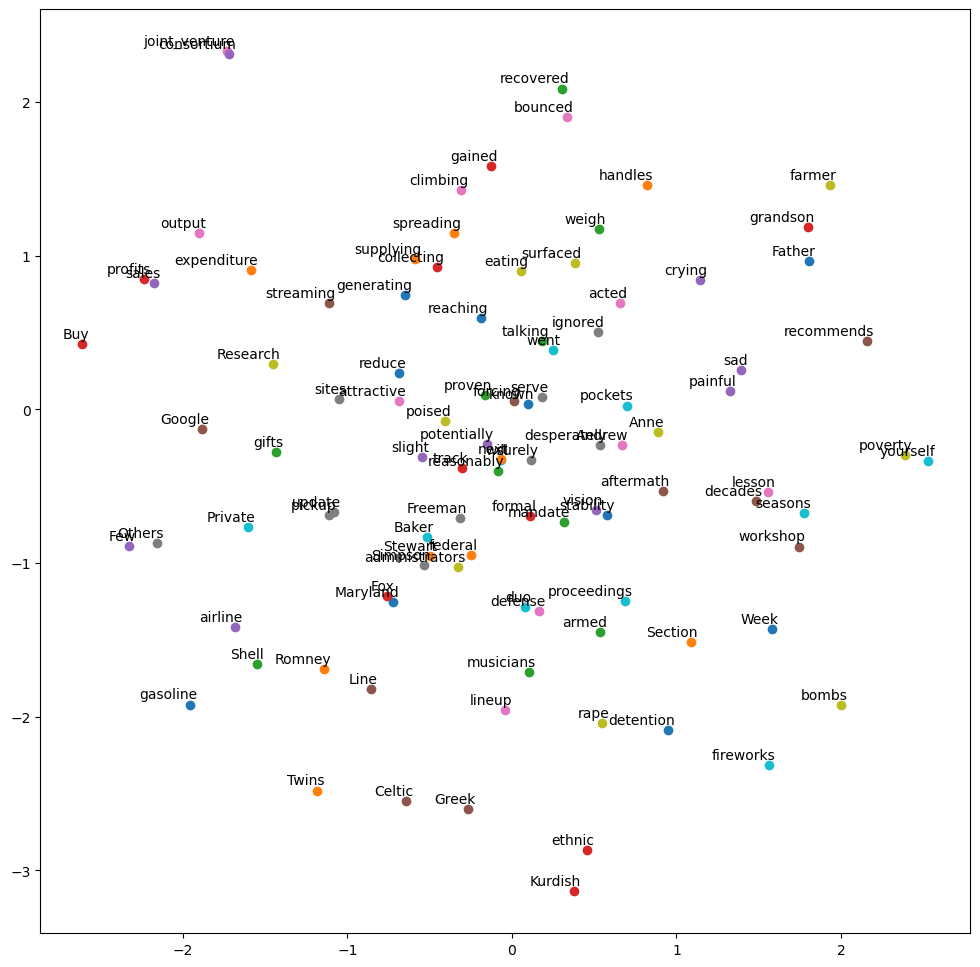

In [12]:
tsne_plot(google_news_model)

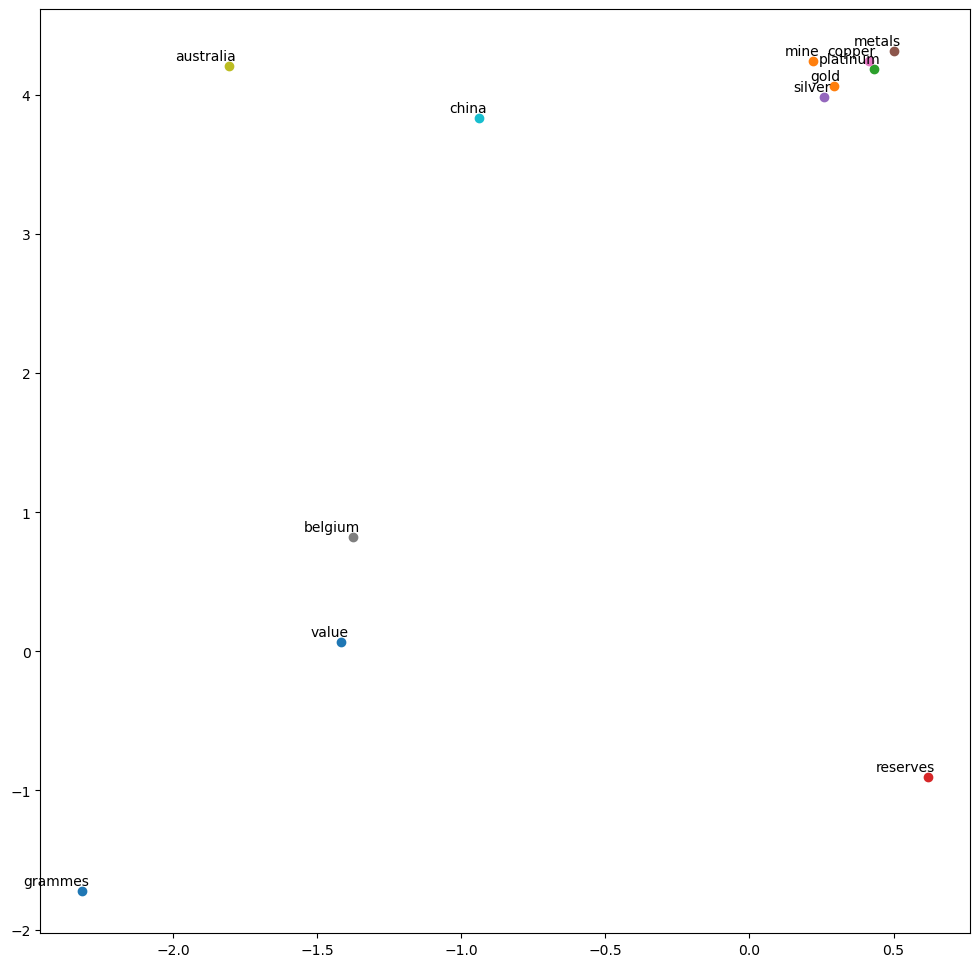

In [10]:
example_words = # FILL IN a list of words, some related and some not
# For example: ['value', 'gold', 'platinum', 'reserves', 'silver', 'metals', 'copper', 'belgium', 'australia', 'china', 'grammes', "mine"]
tsne_plot(google_news_model, words=example_words)

**Notice any interesting patterns? Are semantically similar words grouped together?**